In [1]:
## Problem Statement

## In this Project, we will try to predict Attrition factors dependency based on different features.
## Our target variable is Attrition. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
## Lets check the skewness of data.
import warnings
warnings.filterwarnings('ignore')


In [3]:
df= pd.read_csv(r"C:\Users\Homa\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
##It seems there is  no  missing values as count is same for each columns. Lets check null value column wise.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.loc[df["Attrition"]==" "]
## We can see there are no wide space.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
##Lets remove unwanted  columns.
df.drop('EmployeeCount',
             axis = 1,
             inplace = True)
df.drop('StandardHours',
             axis = 1,
             inplace = True)
df.drop('EmployeeNumber',
             axis = 1, 
             inplace = True)
df.drop('Over18', 
             axis = 1,
             inplace = True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [13]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Attrition", axis=1)
y=df['Attrition']

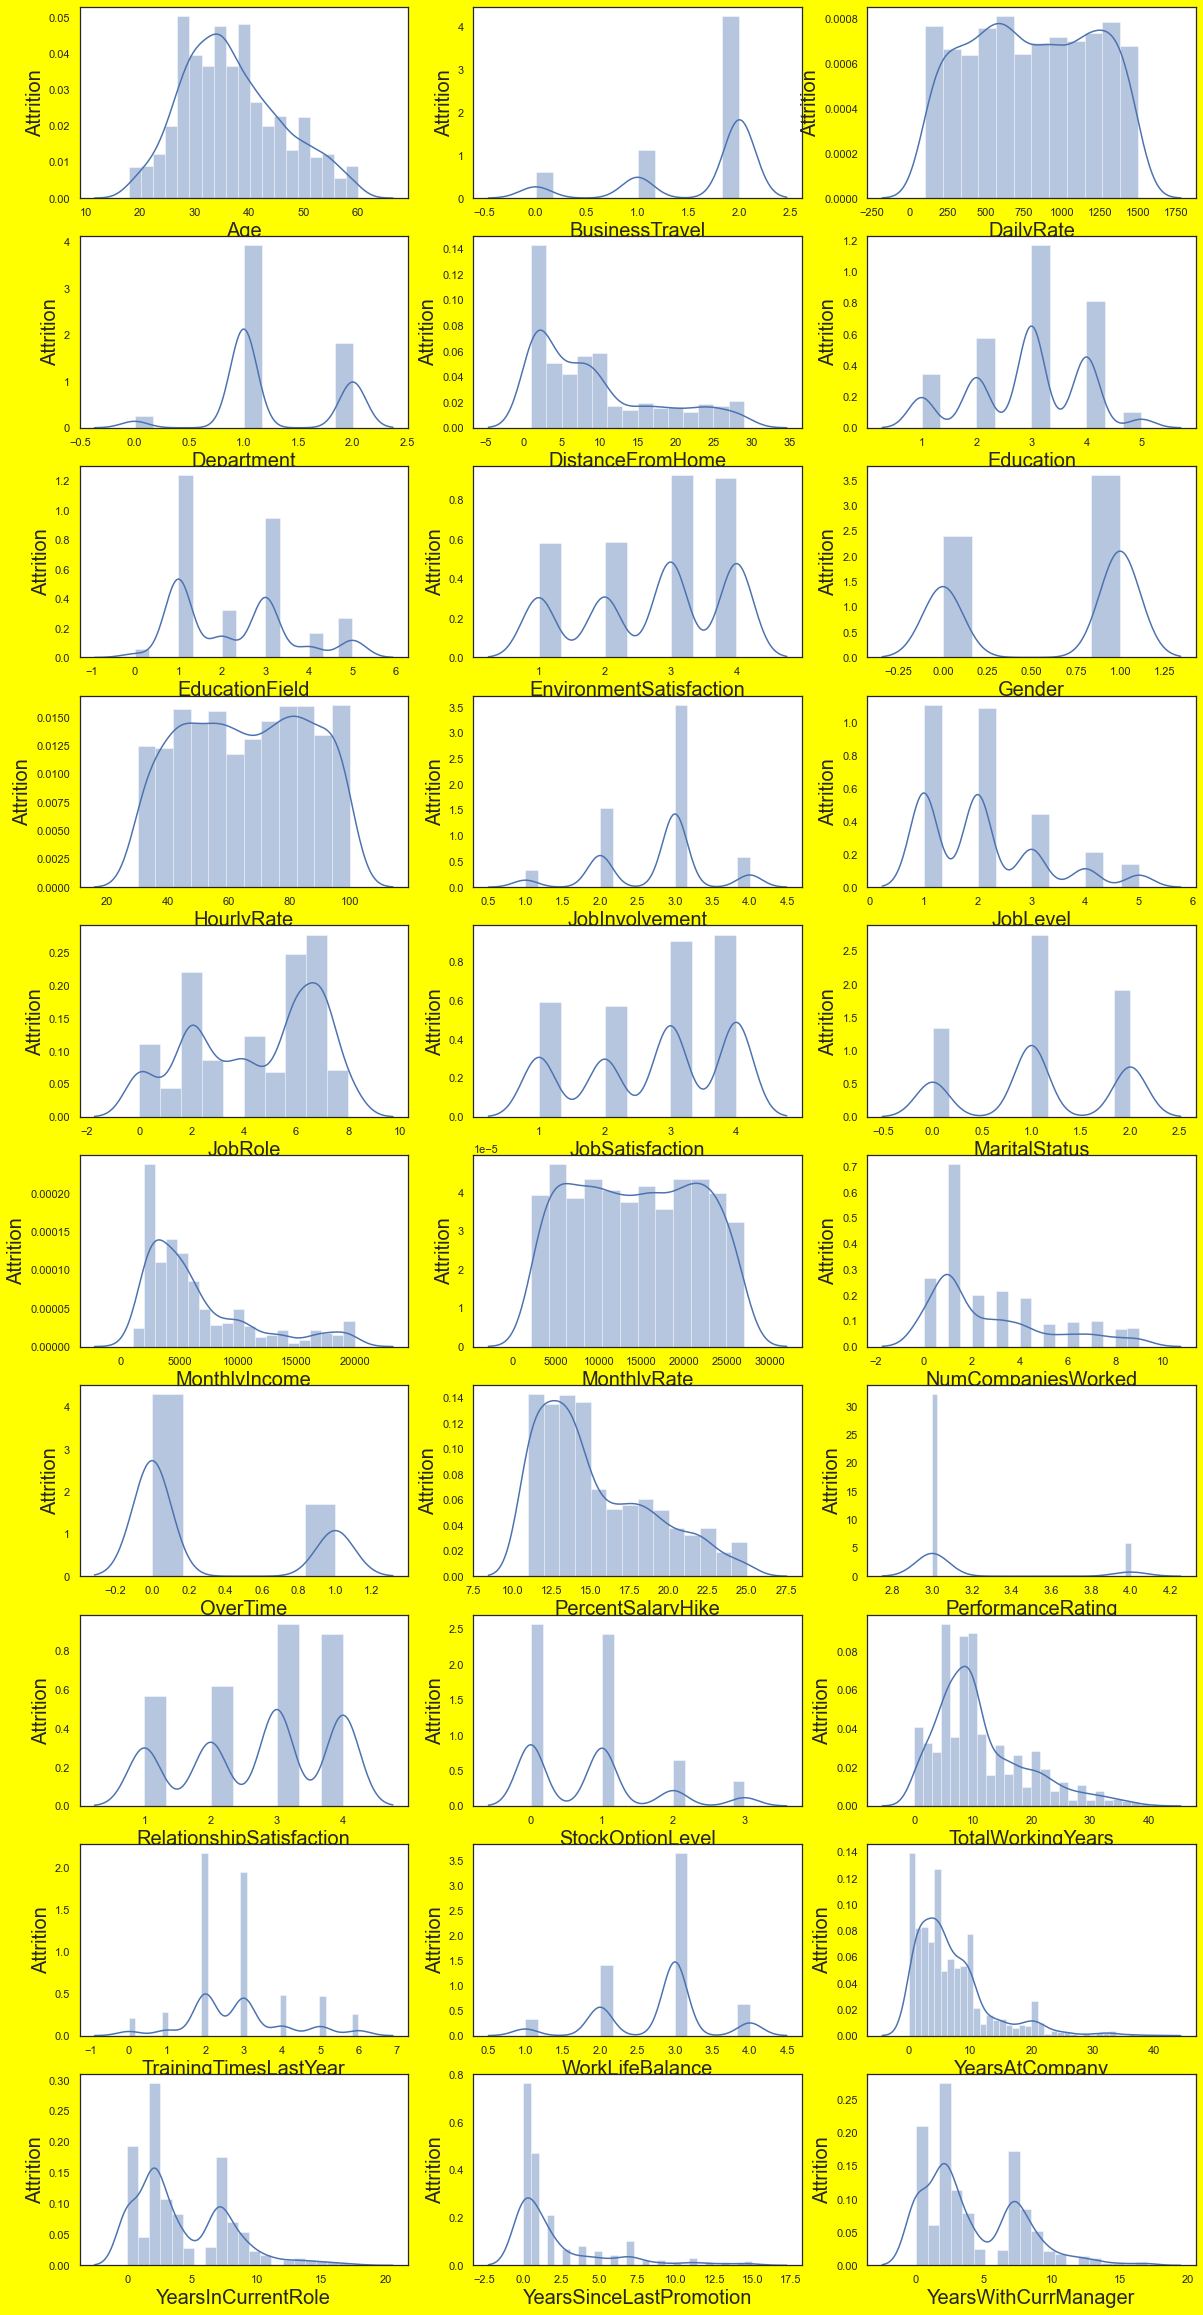

In [14]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        plt.ylabel('Attrition',fontsize=20)
        plotnumber+=1
        
plt.show()

In [15]:
## We can see there are many skewness in different columns like in BusinessTravel, DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel, TotalWorkingYears , YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.
## Lets treat skewness of required columns with continous data.
df['DistanceFromHome']=np.sqrt(df['DistanceFromHome'])
df['PercentSalaryHike']=np.sqrt(df['PercentSalaryHike'])
df['TotalWorkingYears']=np.sqrt(df['TotalWorkingYears'])
df['YearsInCurrentRole']=np.sqrt(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion']=np.sqrt(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager']=np.sqrt(df['YearsWithCurrManager'])

Age
0.41286446154785084


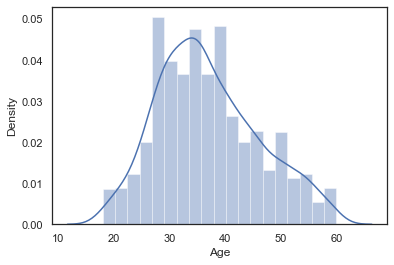

Attrition
1.842483584049465


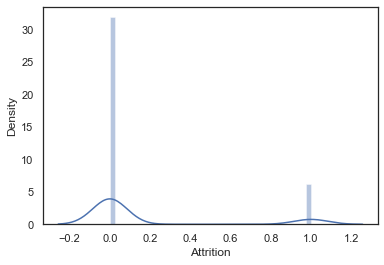

BusinessTravel
-1.4375371829186814


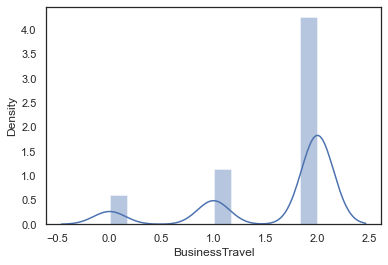

DailyRate
-0.003514976958291024


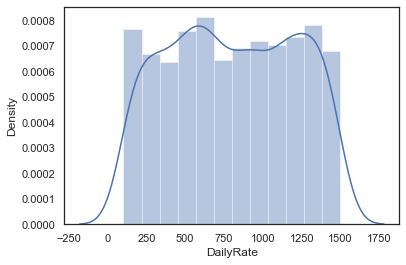

Department
0.17205501555446084


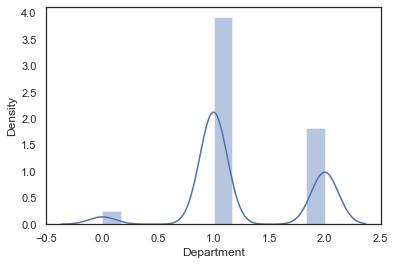

DistanceFromHome
0.3977080243406974


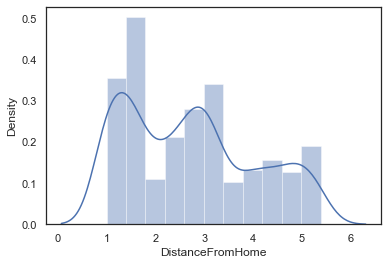

Education
-0.2893854052028825


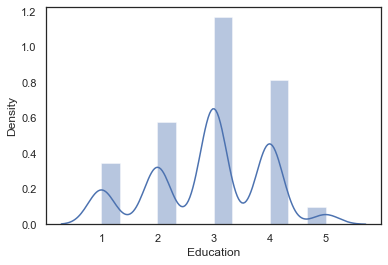

EducationField
0.5498094865361756


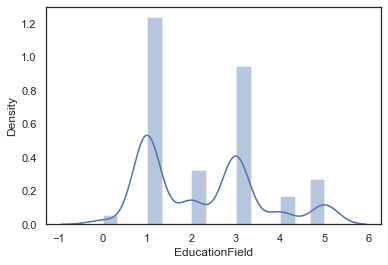

EnvironmentSatisfaction
-0.3213261358382832


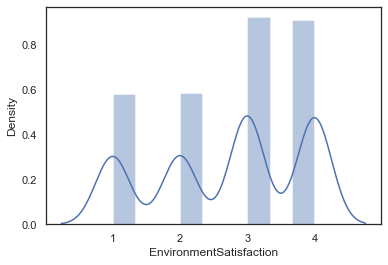

Gender
-0.4082482904638628


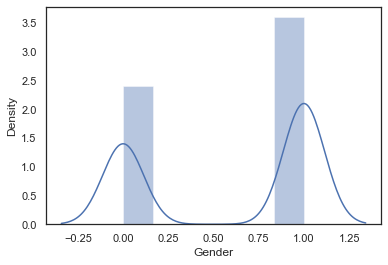

HourlyRate
-0.03227797319055416


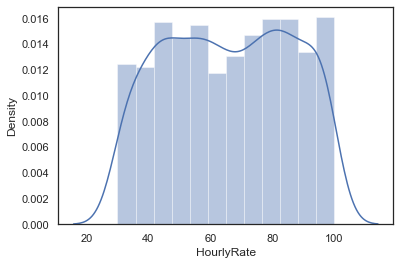

JobInvolvement
-0.4979106286269671


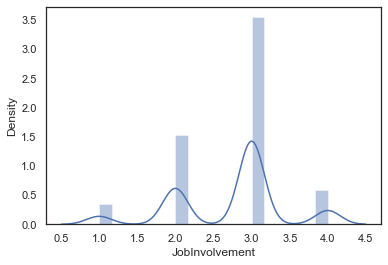

JobLevel
1.0243546583925869


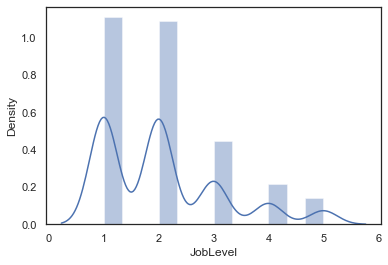

JobRole
-0.3569052550383217


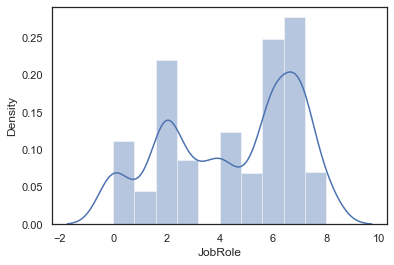

JobSatisfaction
-0.3293354633089524


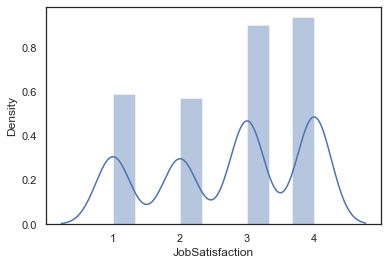

MaritalStatus
-0.15201929651271306


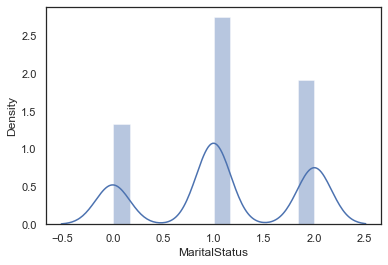

MonthlyIncome
1.3684185123330814


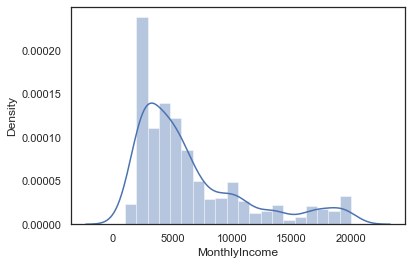

MonthlyRate
0.01855884556846042


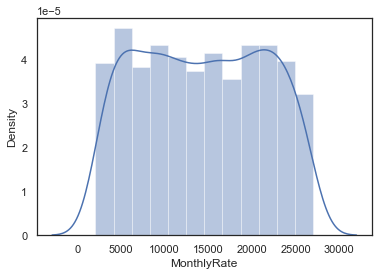

NumCompaniesWorked
1.0254233954371303


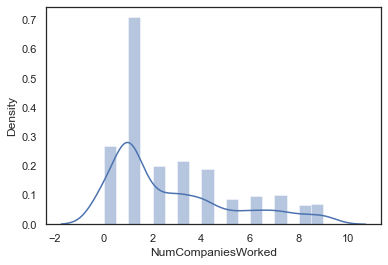

OverTime
0.963504412638946


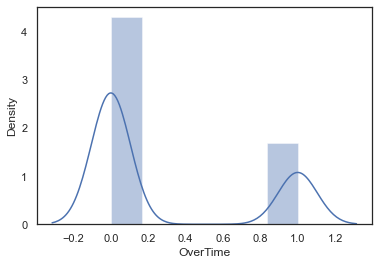

PercentSalaryHike
0.6547426150827689


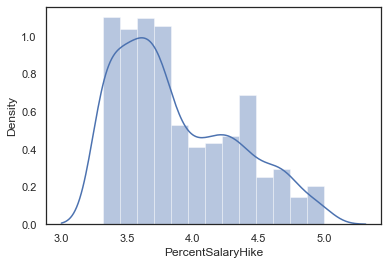

PerformanceRating
1.9199210412109473


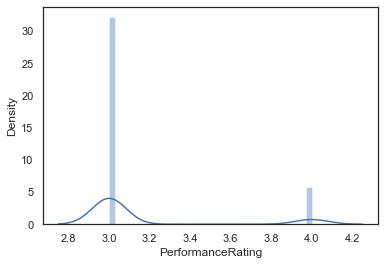

RelationshipSatisfaction
-0.3025184698222079


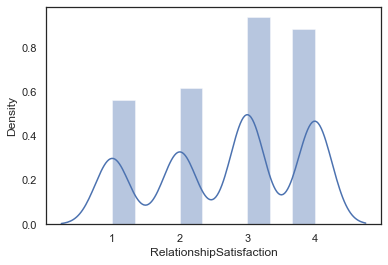

StockOptionLevel
0.9679912809556104


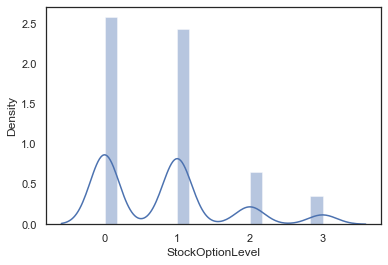

TotalWorkingYears
0.1761783193490487


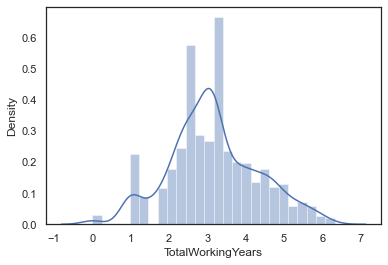

TrainingTimesLastYear
0.5525595985771926


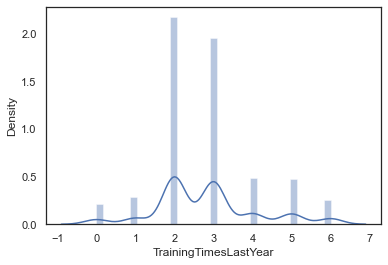

WorkLifeBalance
-0.5519163838185224


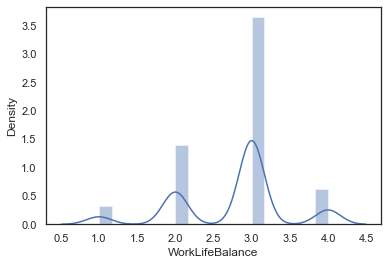

YearsAtCompany
1.7627284034822992


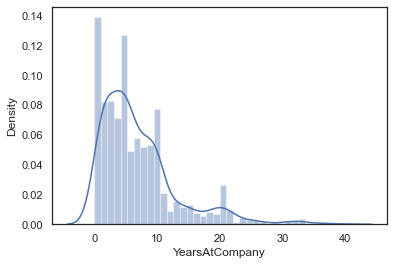

YearsInCurrentRole
-0.2540840810303231


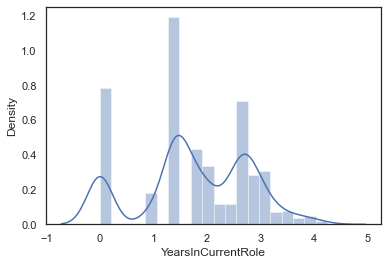

YearsSinceLastPromotion
0.7383711452044008


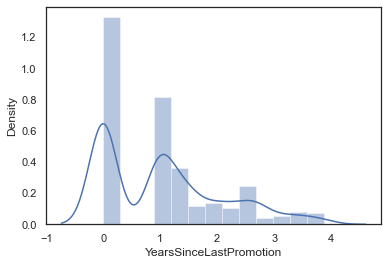

YearsWithCurrManager
-0.2543509487255476


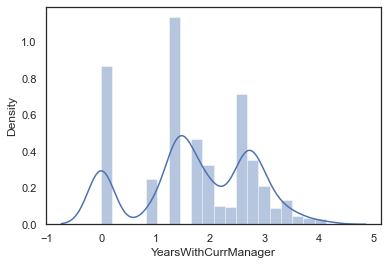

In [16]:
from scipy.stats import skew
for i in df:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    
    plt.show()

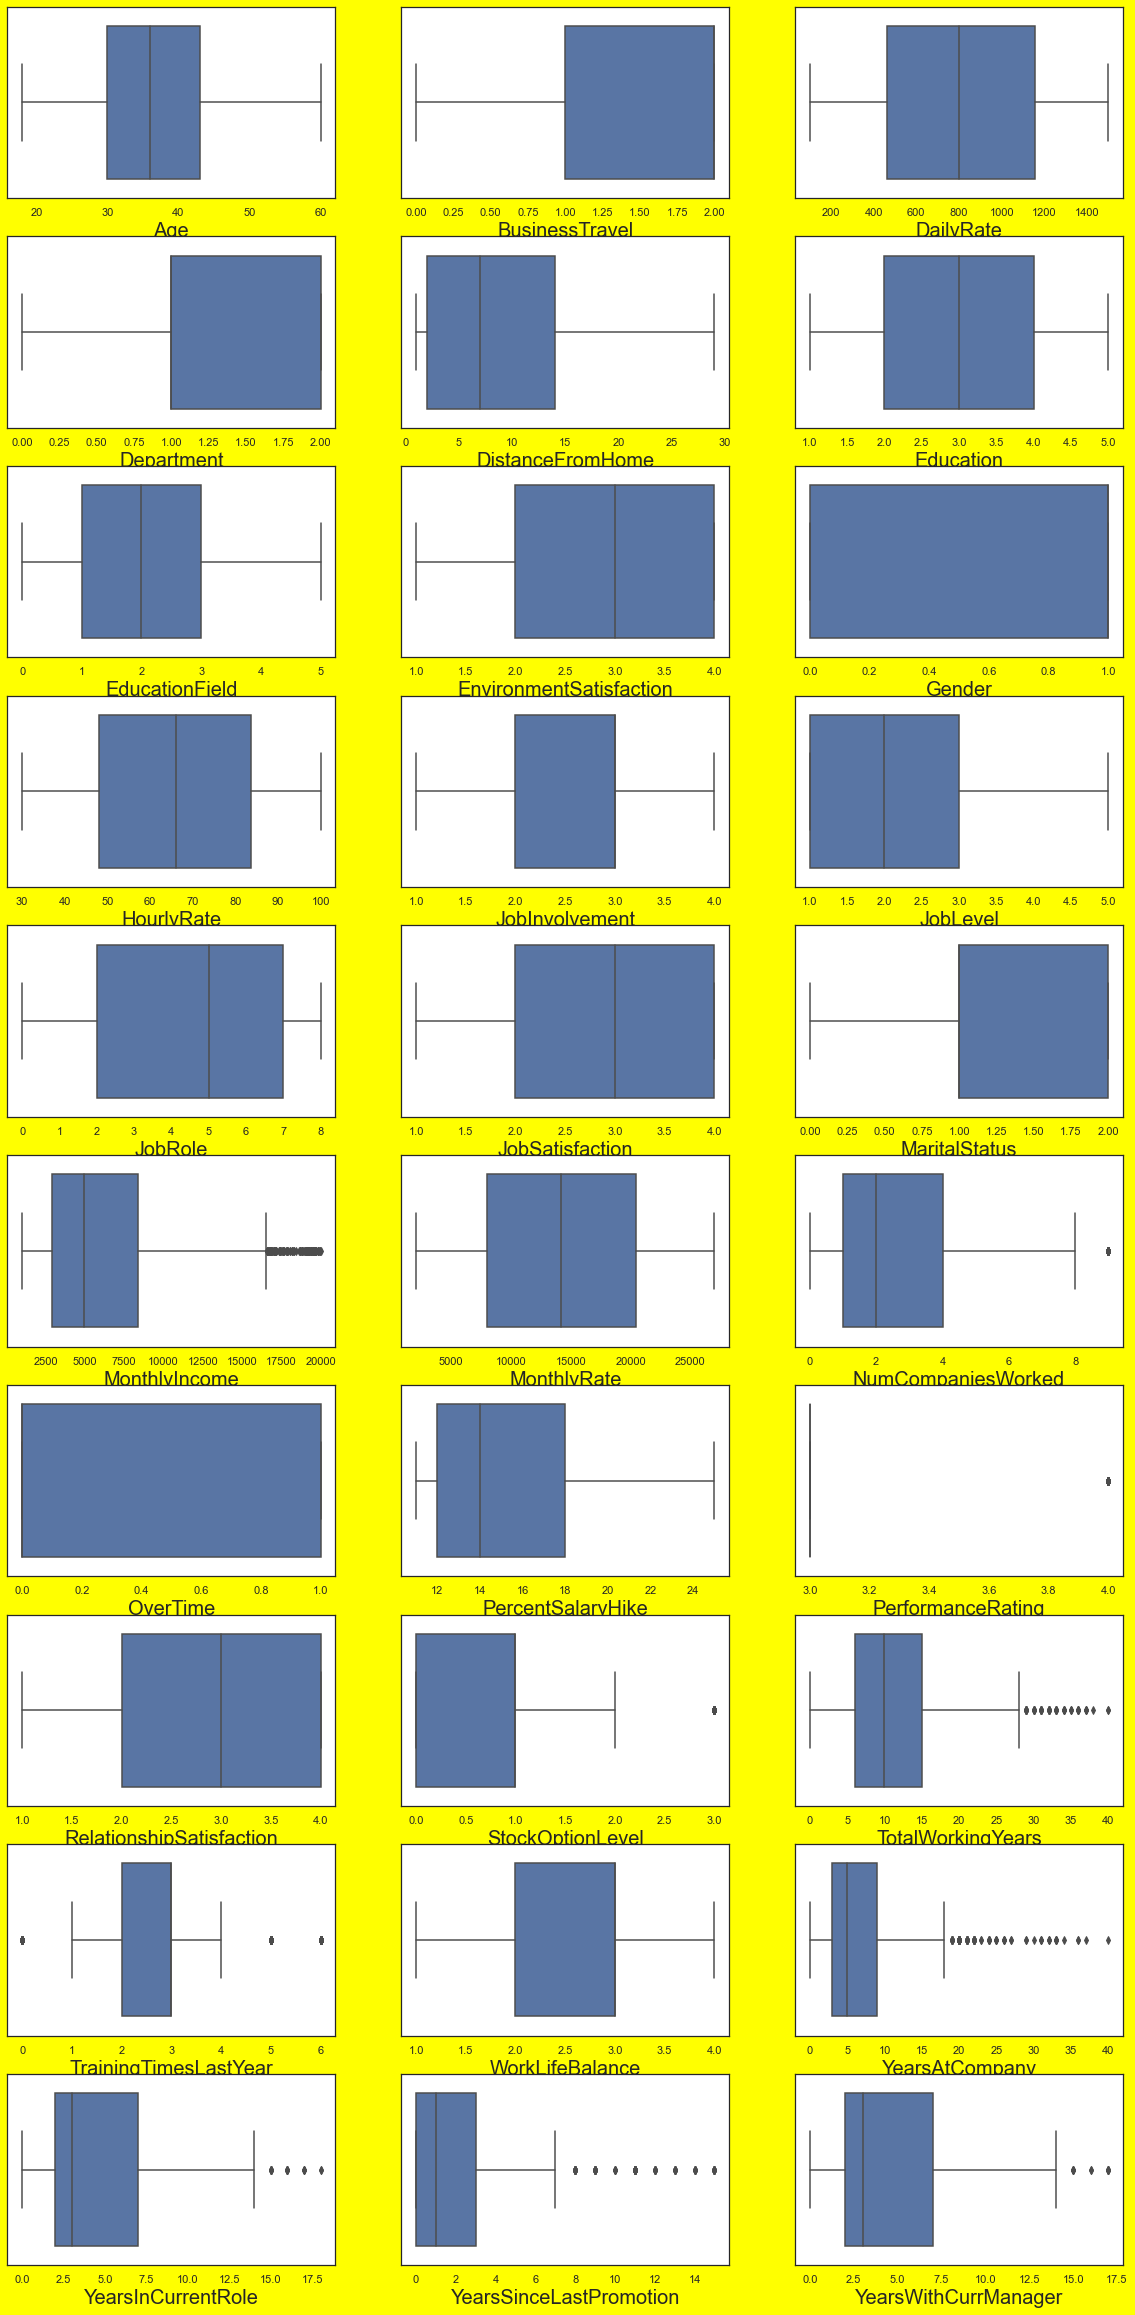

In [17]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [18]:
## we can see outliers in different columns like NumCompaniesWorked,TotalWorkingYears, TrainingTimesLastYear ,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
q1= df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [19]:
df.shape

(1470, 31)

In [20]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
NumCompaniesWorked= (q3.NumCompaniesWorked+(1.5*iqr.NumCompaniesWorked))
NumCompaniesWorked
index= np.where(df['NumCompaniesWorked']>NumCompaniesWorked)
index
df= df.drop(df.index[index])
df.shape


(1418, 31)

In [21]:
TotalWorkingYears= (q3.TotalWorkingYears+(1.5*iqr.TotalWorkingYears))
NumCompaniesWorked
index= np.where(df['TotalWorkingYears']>TotalWorkingYears)
index
df= df.drop(df.index[index])
df.shape


(1411, 31)

In [22]:
TrainingTimesLastYear= (q3.TrainingTimesLastYear+(1.5*iqr.TrainingTimesLastYear))
NumCompaniesWorked
index= np.where(df['TrainingTimesLastYear']>TrainingTimesLastYear)
index
df= df.drop(df.index[index])
df.shape

(1230, 31)

In [23]:
YearsAtCompany= (q3.YearsAtCompany+(1.5*iqr.YearsAtCompany))
YearsAtCompany
index= np.where(df['YearsAtCompany']>YearsAtCompany)
index
df= df.drop(df.index[index])
df.shape

(1144, 31)

In [24]:
df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,2,...,3,1,0,2.828427,0,1,6,2.000000,0.000000,2.236068
1,1,49,0.0,1.0,279,1.0,2.828427,1,1.0,3,...,4,4,1,3.162278,3,3,10,2.645751,1.000000,2.645751
2,2,37,1.0,2.0,1373,1.0,1.414214,2,4.0,4,...,3,2,0,2.645751,3,3,0,0.000000,0.000000,0.000000
3,3,33,0.0,1.0,1392,1.0,1.732051,4,1.0,4,...,3,3,0,2.828427,3,3,8,2.645751,1.732051,0.000000
4,5,32,0.0,1.0,1005,1.0,1.414214,2,1.0,4,...,3,3,0,2.828427,2,2,7,2.645751,1.732051,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1464,26,0.0,2.0,1167,2.0,2.236068,3,4.0,4,...,3,4,0,2.236068,2,3,4,1.414214,0.000000,0.000000
1140,1465,36,0.0,1.0,884,1.0,4.795832,2,3.0,3,...,3,3,1,4.123106,3,3,5,1.414214,0.000000,1.732051
1141,1467,27,0.0,2.0,155,1.0,2.000000,3,1.0,2,...,4,2,1,2.449490,0,3,6,1.414214,0.000000,1.732051
1142,1468,49,0.0,1.0,1023,2.0,1.414214,3,3.0,4,...,3,4,0,4.123106,3,2,9,2.449490,0.000000,2.828427


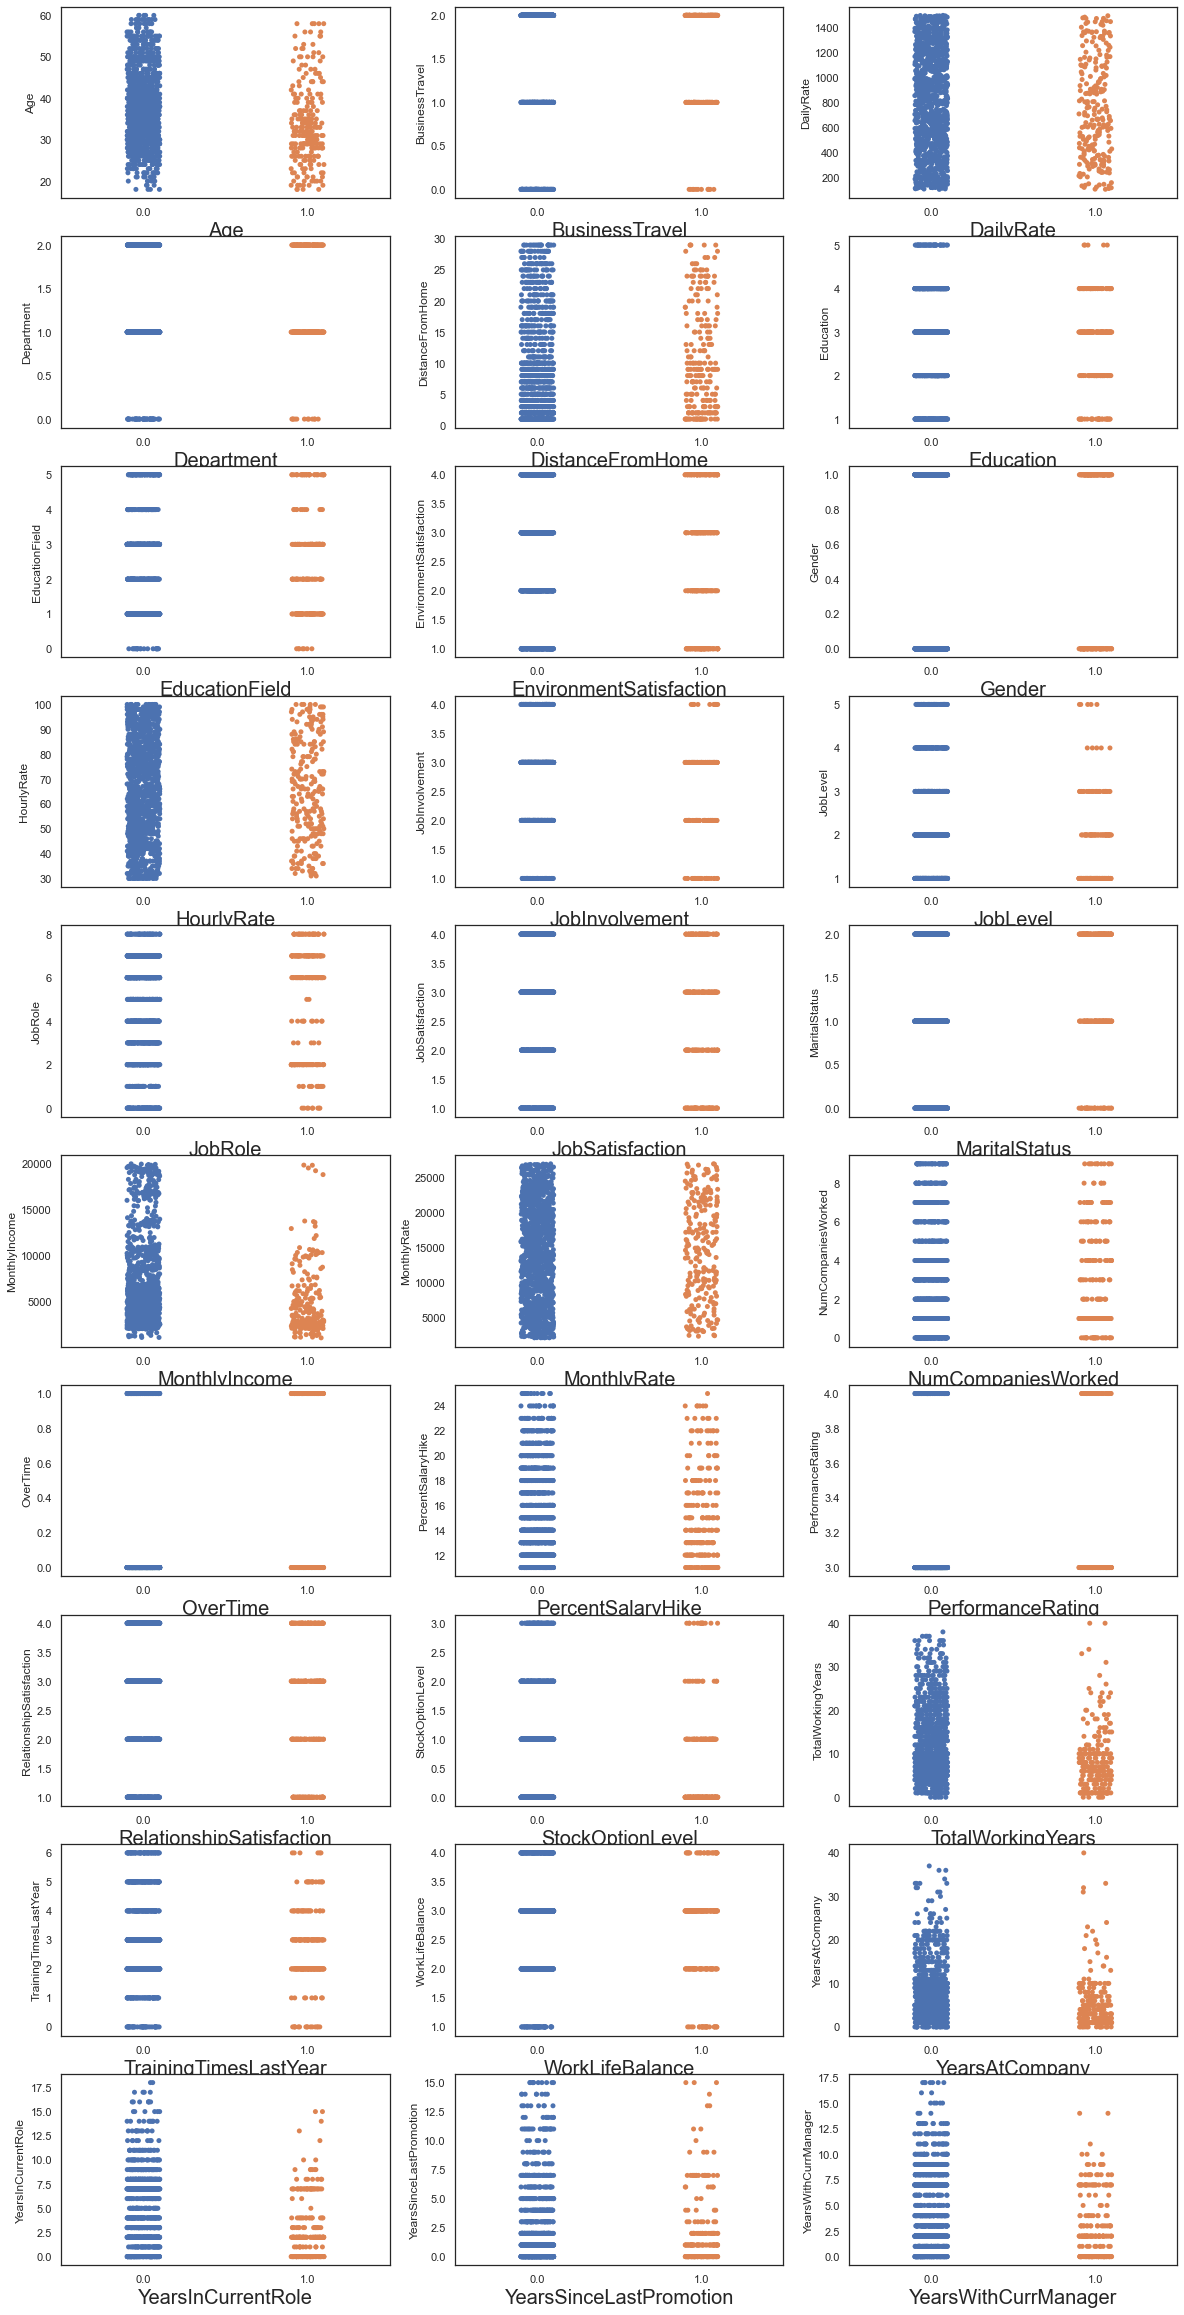

In [25]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50))
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [26]:
## Lets check correlation of differen features with Target variable(Attrition)


In [27]:
print('Correlation of different features of our dataset with Attrition :')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['Attrition'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with Attrition :
Age : -0.1797
Attrition : 1.0000
BusinessTravel : -0.0051
DailyRate : -0.0719
Department : 0.0619
DistanceFromHome : 0.0966
Education : -0.0282
EducationField : 0.0305
EnvironmentSatisfaction : -0.1178
Gender : 0.0281
HourlyRate : -0.0079
JobInvolvement : -0.1238
JobLevel : -0.1843
JobRole : 0.0509
JobSatisfaction : -0.1063
MaritalStatus : 0.1609
MonthlyIncome : -0.1739
MonthlyRate : 0.0319
NumCompaniesWorked : 0.0144
OverTime : 0.2322
PercentSalaryHike : -0.0197
PerformanceRating : 0.0074
RelationshipSatisfaction : -0.0535
StockOptionLevel : -0.1598
TotalWorkingYears : -0.2296
TrainingTimesLastYear : -0.0275
WorkLifeBalance : -0.0779
YearsAtCompany : -0.1704
YearsInCurrentRole : -0.1757
YearsSinceLastPromotion : -0.0312
YearsWithCurrManager : -0.1769


In [28]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,33.303362,Age
1,6.744873,BusinessTravel
2,4.973985,DailyRate
3,12.973418,Department
4,2.317141,DistanceFromHome
5,9.453687,Education
6,3.866745,EducationField
7,7.109660,EnvironmentSatisfaction
8,2.506220,Gender
9,11.244053,HourlyRate


In [31]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [33]:
## I am choosing this model because our taget variable is binary classification.
logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)


LogisticRegression(random_state=40)

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

      Actual  Predicted
289      0.0        0.0
1146     0.0        0.0
1094     0.0        0.0
1441     0.0        0.0
858      0.0        0.0

Confussion matrix:
[[244  11]
 [ 23  16]]


In [35]:
## We can seeconfusion matrix, now lets check Accuracy Score of the model.

In [36]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.8843537414965986


In [37]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       255
         1.0       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294



In [38]:
## I am using different model to verify which is the best model and the most accurate one.

In [39]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

      Actual  Predicted
1041     0.0        0.0
184      0.0        0.0
1222     1.0        0.0
67       0.0        0.0
220      0.0        0.0

Confussion matrix:
[[250   5]
 [ 35   4]]


In [40]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.8639455782312925


In [41]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

      Actual  Predicted
1041     0.0        0.0
184      0.0        0.0
1222     1.0        0.0
67       0.0        0.0
220      0.0        0.0

Confussion matrix:
[[243  12]
 [ 35   4]]


In [42]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.8401360544217688


In [43]:
## We can see Logistic regression Accuracy Score is highest.

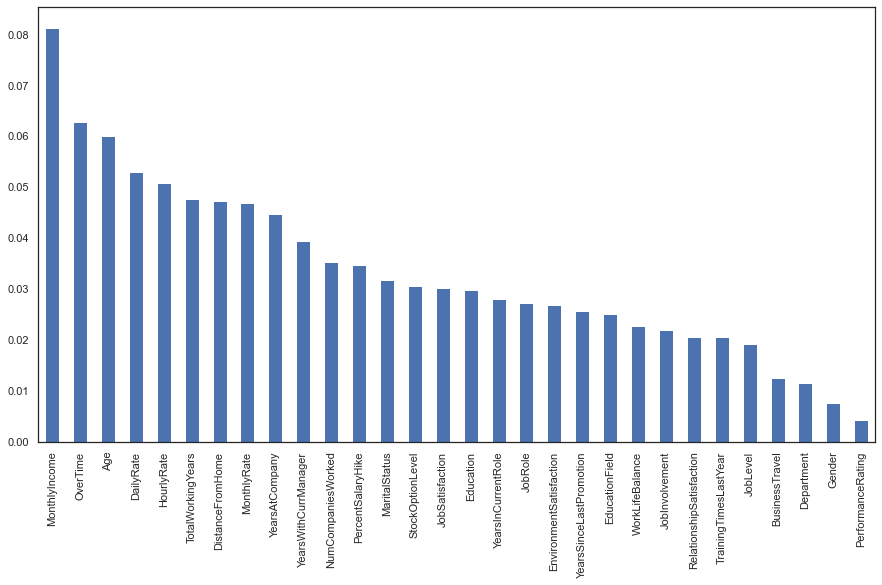

In [44]:
pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));


In [91]:
## Conclusions
##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.
## On the basis of above project we can see Logistic Regration has highest Accuracy value and Monthly income is the most important feature which impact Attrition of  the Employee.